# 신용카드 사기 검출 

- 데이터: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv
- 코드: 핸즈온 비지도 학습

### 데이터 요약
- 불균형 데이터 -> 총 284,807건 중 492건(0.172%) 사기
- features: 28개 (주성분 분석으로 차원 감소시킨 변수) + 거래 시간, 거래 금액, 거래 클래스 = 총 31개 -> target 제외 총 30개 
- target: 거래 클래스(사기:1, 정상:0)

In [1]:
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 관련 라이브러'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''알고리즘 관련 라이브러'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# 데이터 읽기

In [2]:
# 데이터 준비

In [3]:
!pwd

/Users/csg/HomeWorkspace/git/handson-unsupervised-learning-master/datasets/credit_card_data


In [4]:
# 데이터 수집
current_path = os.getcwd()
file_name =  'credit_card.csv'
file = os.path.sep.join(['', 'datasets', 'credit_card_data', file_name])
file_path = current_path + "/" + file_name #file
file_path

'/Users/csg/HomeWorkspace/git/handson-unsupervised-learning-master/datasets/credit_card_data/credit_card.csv'

In [5]:
data = pd.read_csv(file_path)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 데이터 미리 보기

In [6]:
# 데이터 탐색
data.shape

(284807, 31)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### column별 정보(null 개수, 데이터 타입)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### column별 요약 통계량

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# 거래 시간: 0~172,792
# 거래 금액: 0~25,691
data[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### target값 중 사기 데이터 개수
- positive label(label=1) = 사기 데이터: 492건
- negative label(label=0) = 정상 데이터 

In [13]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [14]:
data['Class'].unique()

array([0, 1])

In [15]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### 숫자가 아닌 값 & 결측값 식별하기
- 숫자가 아닌 경우: NaN(not a number)
- 결측값 처리 방법
    - 특정값 대체(평균값, 중앙값 등으로 대치)
- 범주형 데이터 처리 방법
    - 모든 범주형 값을 희소 행렬(행렬값이 대부분 0인 경우) 표현 = 원-핫 행렬로 데이터 인코딩 = 더미변수(1과 0을 가지는 변수로) 변환한 행렬

In [16]:
nanCounter = np.isnan(data).sum()

In [17]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### columns별로 고유값 식별하기

In [18]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [19]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [20]:
# 전체 데이터 (284,807중) 여러 데이터가 동일 시간에 거래 -> 시간 데이터 중복 존재
distinctCounter['Time']

124592

# feature 행렬 & label 배열 생성

### feature 행렬(X) &  label 배열(Y) 생성

In [21]:
# 피쳐 행렬 및 레이블 배열 생성하기
dataX = data.copy().drop(['Class'],axis=1)
dataX.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [22]:
dataY = data['Class'].copy()
dataY

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### cf. data scaling
- 표준화(standardization): 평균 0, 표준 편차:1인 데이터로 변환
- 정규화(normalization): 데이터 0~1 범위로 변환

### feature 행렬(X) 표준화(standardization)하기
- 거래 시간은 제외한 나머지 features 표준화 적용

In [23]:
# 피쳐 스케일링
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [24]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [25]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

In [26]:
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [27]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [28]:
dataX.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [29]:
dataX.describe().loc[['mean', 'std'],scalingFactors.columns]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
mean,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00


### 그래프 그리기

# feature selection & feature engineering
- feature engineering
    - 새로운 feature 생성도 포함 (예: 원본 feature 비율 or 개수 or 합계 생성)
- feature selection
    - training할 feature 선택 및 관련성 없는 feature 제거
    - ML 알고리즘이 dataset의 노이즈에 overfitiing되는 것을 방지

- 해당 데이터는 원본 feature가 없음 -> PCA에서 파생된 주요 성분만 있음 -> 각 feature의 의미를 알수 없음 -> feature engineering 불가
- sample 수(284,807)가 feature 수(30)보다 훨씬 많음 -> feature selection 필요 없음, overfitting 가능성 낮음
- feature간 상관관계가 매우 낮음 -> 이미 PCA를 적용해 불필요하게 중복되는 feature가 없음(cf. feature 제거나 줄이라면 차원감소 적용하면 됨)

### feature 간 상관관계 확인

In [30]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        pearson_corr_coefficient = pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0]
        correlationMatrix.loc[i,j] = np.round(pearson_corr_coefficient,2)

In [31]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1,-0,-0,-0,0,0,0,-0,0,...,0,-0,0,0,-0,-0,-0,0,0,-0.23
V2,-0.01,-0,1,0,-0,0,0,-0,0,-0,...,0,0,0,0,-0,0,0,-0,-0,-0.53
V3,-0.42,-0,0,1,-0,-0,0,0,-0,0,...,0,-0,-0,-0,0,0,-0,0,0,-0.21
V4,-0.11,-0,-0,-0,1,-0,-0,-0,0,0,...,-0,-0,0,0,0,0,-0,-0,-0,0.1
V5,0.17,0,0,-0,-0,1,0,-0,0,0,...,-0,-0,0,0,-0,-0,0,0,-0,-0.39
V6,-0.06,0,0,0,-0,0,1,-0,-0,-0,...,0,-0,-0,0,-0,0,-0,-0,0,0.22
V7,0.08,0,-0,0,-0,-0,-0,1,-0,0,...,0,-0,-0,-0,-0,0,-0,-0,0,0.4
V8,-0.04,-0,0,-0,0,0,-0,-0,1,0,...,0,-0,0,0,-0,-0,0,0,-0,-0.1
V9,-0.01,0,-0,0,0,0,-0,0,0,1,...,-0,0,-0,-0,-0,0,-0,-0,0,-0.04


In [32]:
t = np.round(0.123456789,2)
t.dtype

dtype('float64')

In [33]:
correlationMatrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Time to Amount
Data columns (total 30 columns):
Time      30 non-null object
V1        30 non-null object
V2        30 non-null object
V3        30 non-null object
V4        30 non-null object
V5        30 non-null object
V6        30 non-null object
V7        30 non-null object
V8        30 non-null object
V9        30 non-null object
V10       30 non-null object
V11       30 non-null object
V12       30 non-null object
V13       30 non-null object
V14       30 non-null object
V15       30 non-null object
V16       30 non-null object
V17       30 non-null object
V18       30 non-null object
V19       30 non-null object
V20       30 non-null object
V21       30 non-null object
V22       30 non-null object
V23       30 non-null object
V24       30 non-null object
V25       30 non-null object
V26       30 non-null object
V27       30 non-null object
V28       30 non-null object
Amount    30 non-null object
dtypes: object(30)
memory

In [34]:
correlationMatrix = correlationMatrix.astype(np.float16)

In [35]:
correlationMatrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Time to Amount
Data columns (total 30 columns):
Time      30 non-null float16
V1        30 non-null float16
V2        30 non-null float16
V3        30 non-null float16
V4        30 non-null float16
V5        30 non-null float16
V6        30 non-null float16
V7        30 non-null float16
V8        30 non-null float16
V9        30 non-null float16
V10       30 non-null float16
V11       30 non-null float16
V12       30 non-null float16
V13       30 non-null float16
V14       30 non-null float16
V15       30 non-null float16
V16       30 non-null float16
V17       30 non-null float16
V18       30 non-null float16
V19       30 non-null float16
V20       30 non-null float16
V21       30 non-null float16
V22       30 non-null float16
V23       30 non-null float16
V24       30 non-null float16
V25       30 non-null float16
V26       30 non-null float16
V27       30 non-null float16
V28       30 non-null float16
Amount    30 non-null flo

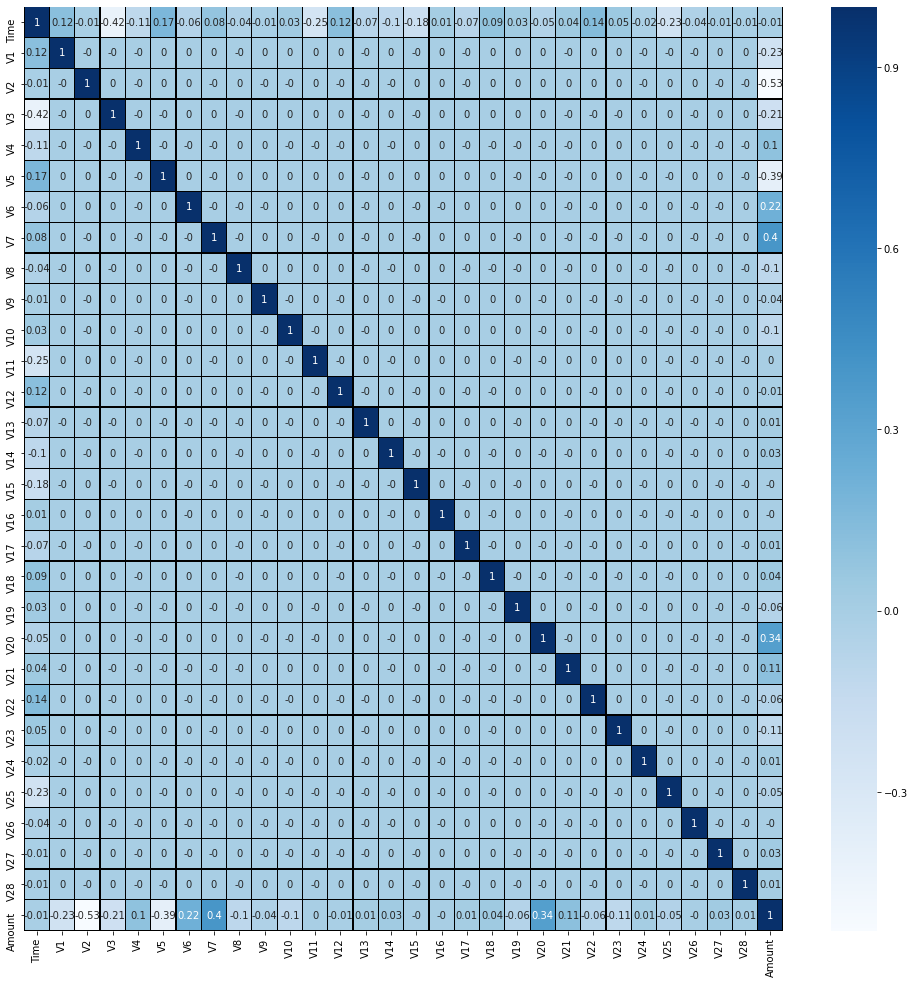

In [36]:
plt.figure(figsize=(17,17)) #가로, 세로
sns.heatmap(correlationMatrix, annot=True, cmap="Blues", linecolor="black", linewidths=.2) # cbar=None,
plt.show()

In [37]:
save_file_name = 'correlationMatrix.csv'
#correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
save_file_path = current_path + "/" + save_file_name #file
print("save_file_path:", save_file_path)
correlationMatrix.to_csv(save_file_path)

save_file_path: /Users/csg/HomeWorkspace/git/handson-unsupervised-learning-master/datasets/credit_card_data/correlationMatrix.csv


# 데이터 시각화하기

In [38]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
count_classes

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency Percentage')

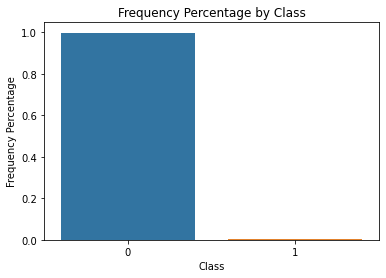

In [39]:
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

# 모델 준비하기

### train & test dataset으로 분할하기

In [40]:
# 모델 준비

In [41]:
# 모델을 학습 시켜서 일반화 오차(=표본외오차, 새로운 데이터에 대한 모델 성능)를 최소화

In [42]:
# stratify: train/test dataset에서 각각 사기 비율을 유지
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                                    dataY, 
                                                    test_size=0.33, 
                                                    random_state=2018, 
                                                    stratify=dataY)

In [43]:
# train 데이터: 190,820 (67%)
len(X_train)

190820

In [44]:
# test 데이터: 93,987(33%)
len(X_test)

93987

In [45]:
# train 데이터의 사기 비율
y_train.sum()/len(y_train)

0.0017293784718582959

In [46]:
y_train.value_counts()

0    190490
1       330
Name: Class, dtype: int64

In [47]:
# test 데이터의 사기 비율
y_test.sum()/len(y_test)

0.0017236426314277506

In [48]:
y_test.value_counts()

0    93825
1      162
Name: Class, dtype: int64

### 비용함수 선택하기
- 비용함수(cost function) = 오차율 = 가치 함수 
- ML알고리즘은 train dataset으로 cost function을 최소화함
- 2클래스 분류 문제 & 지도학습 -> 이진 분류 로그 손실함수(binary classification log loss)
- 각 거래별로 사기일 확률을 생성
    - 사기 확률이 실제 label(사기:1, 정상:0)에 가까울수록, log loss값은 낮아짐

### binary classification log loss
- 실제 label과 모델 기반 예측 label 사이의 교차 엔트로피(cross entropy)를 계산
- $log loss = - \frac{1}{n}\sum_{i=1}^N\sum_{j=1}^M y_{i,j}log(P_{i,j})$
    - $N$: sample 수
    - $M$: class label 수
    - $log$: 자연로그
    - $y_{i,j}$: sample $i$가 class $j$에 있으면 1, 아니면 0
    - $p_{i,j}$: sample $i$가 class $j$에 포함될 예측 확률


### 그래프 그리기

### k-fold 교차 검증(cross validation) dataset 생성하기
- train 데이터에서 다시 train 데이터와 validation 데이터로 구분하기 
- k번 훈련하고, k번 평가할 수 있음

### 그래프그리기

In [49]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

# ML 모델(1): logistic regression

In [50]:
# 로지스틱 회귀분석

### 하이퍼파라미터 설정하기

* 패널티
    - L2가 L1에 비해 outlier에 덜 민감하여, 거의 모든 feature에 0이 아닌 가중치를 할당해 안정적인 솔루션을 제공
    - L1은 가장 중요한 feature에 높은 가중치를 할당하고 나머지는 0에 가까운 가중치를 할당함 -> 가중치는 피처에 따라 많이 달라질 수 있으므로 L1은 데이터 변화에 안정적이지 않음
* 정규화 강도
    - 정규화는 복잡성을 제거해 overfitting을 해결하는데 도움이 됨
    - 정규화가 강할수록 ML알고리즘 복잡성을 단순화 함(복잡한 모델->단순한 모델로 유도)
    - 양의 부동소수점 숫자
    - 값이 작을 수록 정규화가 강해짐
    - 기본값: 1.0 -> check
* 클래스 균형
    - 불균형 데이터에서 클래스 균형을 맞춰줌
    - 알고리즘이 training할 때, positive label에 더 무게를 둠
    - 가중치는 클래스 빈도에 반비례함
         - 희귀한 positive label(사기)에 높은 가중치를 할당
         - 빈번한 negative label(정상)에 낮은 가중치 할당
* solver
    - 최적해 탐색 알고리즘 지정 -> check

In [51]:
# 패널티 설정: L2
penalty = 'l2'
# 정규화 강도
C = 1.0
# 클래스 균형
class_weight = 'balanced'
# 실험 결과 재현
random_state = 2018
# 최적해 탐색 알고리즘
solver = 'liblinear'
n_jobs = 1

In [52]:
logReg = LogisticRegression(penalty=penalty, 
                            C=C, 
                            class_weight=class_weight, 
                            random_state=random_state, 
                            solver=solver, 
                            n_jobs=n_jobs)

### 모델 훈련하기

In [53]:
def train_fold(X_train, y_train, train_index, cv_index):
    
    # fold 데이터 만들기
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    # 모델 훈련
    model.fit(X_train_fold, y_train_fold)
    
    #-------------------------------------------------------------#
    # 훈련 손실 계산
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    #trainingScores.append(loglossTraining)
    
    # 검증 데이터 예측 확률
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    #print("model.predict_proba(X_cv_fold):\n", model.predict_proba(X_cv_fold))
    
    # 검증 손실 계산
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    
    #cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
    return loglossTraining, loglossCV

In [54]:
trainingScores = []
cvScores = []

In [55]:
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])
predictionsBasedOnKFolds

,0,1
142087,NaN,NaN
165168,NaN,NaN
235908,NaN,NaN
148255,NaN,NaN
145672,NaN,NaN
...,...,...
30023,NaN,NaN
195475,NaN,NaN
48687,NaN,NaN
159608,NaN,NaN


In [56]:
model = logReg

In [57]:
len(X_train)

190820

- k fold별 train log loss와  validation log loss(cv log loss) 계산
- 일반적으로 train log loss가 validation log loss(cv log loss)보다 작음
- ML 알고리즘은 train dataset에서 바로 학습했기 때문에, cv dataset보다 성능이 좋아야 함(cv dataset는 모델 train시 사용하지 않은 데이터)
- 5 fold에서 train, cv loss가 유사 -> overfitting 발생 안함(cf. overfitting시, train loss는 낮고, cv loss는 상대적으로 높음)

In [58]:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    #print("train_index:",train_index)
    #print("train_index len:",len(train_index))
    #print("cv_index:",cv_index)
    #print("cv_index len:",len(cv_index))
    loglossTraining, loglossCV = train_fold(X_train, y_train, train_index, cv_index)
    trainingScores.append(loglossTraining)
    cvScores.append(loglossCV)
    print("--------------------------------")

Training Log Loss:  0.10966429604446587
CV Log Loss:  0.1087891352622263
--------------------------------
Training Log Loss:  0.10456253074525207
CV Log Loss:  0.10403949181351084
--------------------------------
Training Log Loss:  0.11540783525175093
CV Log Loss:  0.11767517718933185
--------------------------------
Training Log Loss:  0.11558023366754933
CV Log Loss:  0.11816695381886932
--------------------------------
Training Log Loss:  0.09710541264734372
CV Log Loss:  0.09703539168460679
--------------------------------


In [98]:
redictionsBasedOnKFolds.loc[:,:]

NameError: name 'redictionsBasedOnKFolds' is not defined

In [59]:
predictionsBasedOnKFolds.loc[:,1]

142087    0.000824029
165168      0.0319592
235908        0.15947
148255     0.00699211
145672      0.0373431
             ...     
30023        0.251502
195475      0.0391392
48687       0.0184795
159608     0.00471076
197673    0.000297749
Name: 1, Length: 190820, dtype: object

- k fold별 cv dataset에 대한 예측 정보를 저장하여, 하나의 dataset으로 결합한 뒤 전체 train datast에 대한 log loss 계산
- 최종 test dataset에 대한 log loss의 최적화된 추정값 

In [60]:
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Logistic Regression Log Loss:  0.10914122995370903


### 평가 지표

- Recall(재현율): train dataset에 사기 거래를 얼마나 찾아냈나?

- Precision(정밀도): 예측 모델이 사기라고 예측한 사기 거래 중 실제 사기 거래는 얼마나 찾아냈나? 

- Confusion matrix
  - 일반적 분류 문제에서 적용해 결과 평가 가능
  - true/false[맞았냐,틀렸냐] + positive/negative[예측결과]  개수 요약표
    - true positive
    - true negative
    - false positive = 제 1종 오류 = 오경보
    - false negative = 제 2종 오류 = 누락
  - 분류 클래스가 균형적일 때만 적용 가능 -> 불균형일 때 적합하지 않음
-  Precision-Recall Curve 
  - 불균형 클래스일때 precision과 recall이 적합
  - **Precision** = ture positive / (true positive + <u>false positive</u>)
    - 높은 precision = 사기라고 예측한것 중 실제 사기가 많음 -> false positive 비율이 낮음
  - **Recall** = ture positive / (true positive + <u>false negative</u>)
    - 높은 recall = 실제 사기 중 대부분을 사기라고 예측함 -> false negative 비율이 낮음
  - Precision-Recall 균형 -> 그래프 그리기
    - **Recall은 높지만**, Precision이 낮을 경우
      - **실제 positive(사기)는 많이 잡지만, 동시에 오경보도 많음**
      - 신용 카드 회사는 더 많은 사기를 찾겠지만, 정상 거래를 불필요하게 거절해 고객을 화나게 함
    - **Precision은 높지만,** Recall이 낮은 경우
      - **실제 positive(사기) 중 일부만 잡지만, 예측 결과는 대부분 정확함**
      - 신용 카드 회사는 사기로 돈을 많이 잃을 수는 있지만, 불필요하게 카드 거래를 거절해 고객 반감을 사진 않음
    - 최적의 솔루션
      - 높은 Precision &  높은 Recall
      - **실제 사기만 거절(높은 Precision)**하고, **dataset에 있는 대부분의 사기는 탐지(높은 Recall)**하도록 해야함
  - Precision-Recall trade off ->  Precision-Recall Curve 
- AUROC(수신자 조작 특성 아래 면적)
  - 수신자 조작 특성 곡선(ROC, 수신자 조작 특성) 
    - x축: false positive 비율 
    - y축: true positive 비율 
  - **아래 면적이 클수록 좋은 모델** 

### 모델 평가하기

In [61]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
predictionsBasedOnKFoldsLogisticRegression

,trueLabel,prediction
142087,0,0.000824029
165168,0,0.0319592
235908,0,0.15947
148255,0,0.00699211
145672,0,0.0373431
...,...,...
30023,0,0.251502
195475,0,0.0391392
48687,0,0.0184795
159608,0,0.00471076


### Precision-Recall Curve 그리기

In [62]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

### 평균 정밀도(average precision) 계산

In [63]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.74')

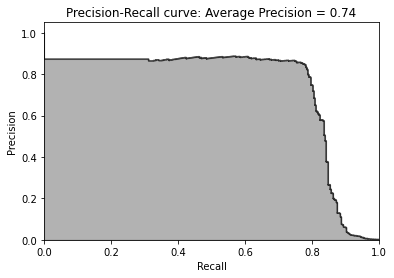

In [64]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

### ROC Curve 그리기

In [65]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

### AUC 계산

In [66]:
areaUnderROC = auc(fpr, tpr)
print("areaUnderROC:", areaUnderROC)

areaUnderROC: 0.9705889754810957


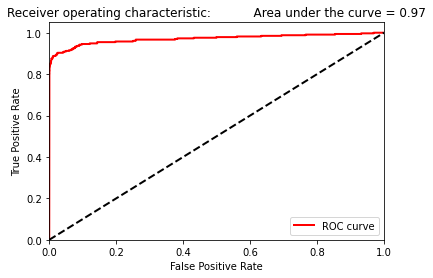

In [67]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# ML 모델(2): random forest

### 하이퍼파라미터 설정

In [68]:

n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

### 모델 훈련하기

In [69]:

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0004570758747246713
CV Log Loss:  0.009090797476425144
Training Log Loss:  0.0004101805310493279
CV Log Loss:  0.012640234648018377
Training Log Loss:  0.00040027341363592047
CV Log Loss:  0.009990776910341356
Training Log Loss:  0.0003894650263288808
CV Log Loss:  0.006620007375395402
Training Log Loss:  0.0004291016183715201
CV Log Loss:  0.01348243171548044
Random Forests Log Loss:  0.010364849625132141


### 모델 평가하기

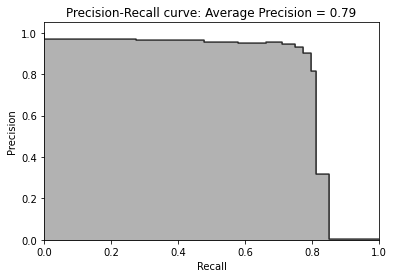

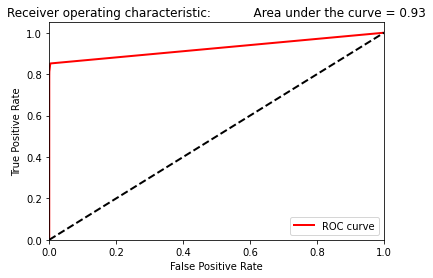

In [70]:

preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# ML 모델(3): XGBoost

### 하이퍼파라미터 설정하기

In [71]:

params_xGB = {
    'nthread':16, # 코어 수
    'learning rate': 0.3, # 학습률 : 범위 (0 ~ 1) , 디폴트 0.3
    'gamma': 0, # 감마 : 범위 (0 ~ 무한대) , 디폴트 0
        # 이 값이 높으면 복잡성이 감소(편향 증가, 변동 감소) 
    'max_depth': 6, # max_depth : 범위 (1 ~ 무한대) , 디폴트 6 ## 트리의 최대 깊이
    'min_child_weight': 1, # min_child_weight : 범위 (0 ~ 무한대) , 디폴트 1 ## 자식노드에 필요한 가중치의 최소 합계
    'max_delta_step': 0, # max_delta_step : 범위 (0 ~ 무한대) ,  디폴트 0 ## 각 트리의 가중치 추정을 위한 최대 델타 단계
    'subsample': 1.0, # subsample : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 데이터의 샘플링 비율
    'colsample_bytree': 1.0, # colsample_bytree : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 피쳐의 샘플링 비율
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

### 모델 훈련하기

In [72]:

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    # 수정 사항 : np.arrary 로 재정의 하면서 경고 메세지를 지울 수 있음
    best_rounds = np.argmin(np.array(bst['test-logloss-mean']))
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[19:52:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:52:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:52:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or so

[20:09:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:09:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:09:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or so

### 모델 평가하기

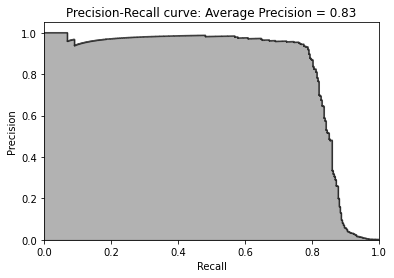

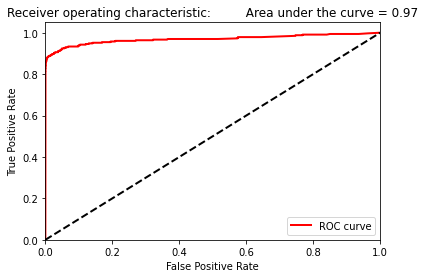

In [73]:

preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# ML 모델(4): LightGBM

In [74]:

params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [75]:

### 모델 훈련하기

In [76]:

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00627492
[3]	valid_0's binary_logloss: 0.00620527
[4]	valid_0's binary_logloss: 0.00616014
[5]	valid_0's binary_logloss: 0.00609608
[6]	valid_0's binary_logloss: 0.0060474
[7]	valid_0's binary_logloss: 0.0059922
[8]	valid_0's binary_logloss: 0.00593688
[9]	valid_0's binary_logloss: 0.00588275
[10]	valid_0's binary_logloss: 0.00582962
[11]	valid_0's binary_logloss: 0.00577838
[12]	valid_0's binary_logloss: 0.00573037
[13]	valid_0's binary_logloss: 0.00568343
[14]	valid_0's binary_logloss: 0.00563845
[15]	valid_0's binary_logloss: 0.00559177
[16]	valid_0's binary_logloss: 0.00554777
[17]	valid_0's binary_logloss: 0.00550471
[18]	valid_0's binary_logloss: 0.00546175
[19]	valid_0's binary_logloss: 0.00542175
[20]	valid_0's binary_logloss: 0.00538166
[21]	valid_0's binary_logloss: 0.00534326
[22]	valid_0's binary_logloss: 0.00530349
[23]	valid_0's binary_log

[198]	valid_0's binary_logloss: 0.00304147
[199]	valid_0's binary_logloss: 0.00303847
[200]	valid_0's binary_logloss: 0.00303475
[201]	valid_0's binary_logloss: 0.00303167
[202]	valid_0's binary_logloss: 0.00302863
[203]	valid_0's binary_logloss: 0.00302312
[204]	valid_0's binary_logloss: 0.0030201
[205]	valid_0's binary_logloss: 0.00301537
[206]	valid_0's binary_logloss: 0.00301267
[207]	valid_0's binary_logloss: 0.00300808
[208]	valid_0's binary_logloss: 0.00300537
[209]	valid_0's binary_logloss: 0.00300409
[210]	valid_0's binary_logloss: 0.00299942
[211]	valid_0's binary_logloss: 0.00299826
[212]	valid_0's binary_logloss: 0.00299417
[213]	valid_0's binary_logloss: 0.00299162
[214]	valid_0's binary_logloss: 0.00299028
[215]	valid_0's binary_logloss: 0.00298514
[216]	valid_0's binary_logloss: 0.00298262
[217]	valid_0's binary_logloss: 0.00298179
[218]	valid_0's binary_logloss: 0.00297867
[219]	valid_0's binary_logloss: 0.00297626
[220]	valid_0's binary_logloss: 0.0029754
[221]	valid_0

[396]	valid_0's binary_logloss: 0.00273458
[397]	valid_0's binary_logloss: 0.00273316
[398]	valid_0's binary_logloss: 0.00273292
[399]	valid_0's binary_logloss: 0.00273124
[400]	valid_0's binary_logloss: 0.00273127
[401]	valid_0's binary_logloss: 0.00273112
[402]	valid_0's binary_logloss: 0.00273044
[403]	valid_0's binary_logloss: 0.00272883
[404]	valid_0's binary_logloss: 0.00272843
[405]	valid_0's binary_logloss: 0.00272701
[406]	valid_0's binary_logloss: 0.00272636
[407]	valid_0's binary_logloss: 0.00272601
[408]	valid_0's binary_logloss: 0.0027249
[409]	valid_0's binary_logloss: 0.00272441
[410]	valid_0's binary_logloss: 0.00272429
[411]	valid_0's binary_logloss: 0.00272406
[412]	valid_0's binary_logloss: 0.00272231
[413]	valid_0's binary_logloss: 0.00271983
[414]	valid_0's binary_logloss: 0.00271813
[415]	valid_0's binary_logloss: 0.0027186
[416]	valid_0's binary_logloss: 0.00271696
[417]	valid_0's binary_logloss: 0.00271746
[418]	valid_0's binary_logloss: 0.00271794
[419]	valid_0

[591]	valid_0's binary_logloss: 0.00265496
[592]	valid_0's binary_logloss: 0.00265405
[593]	valid_0's binary_logloss: 0.00265433
[594]	valid_0's binary_logloss: 0.00265458
[595]	valid_0's binary_logloss: 0.00265455
[596]	valid_0's binary_logloss: 0.00265484
[597]	valid_0's binary_logloss: 0.00265492
[598]	valid_0's binary_logloss: 0.00265493
[599]	valid_0's binary_logloss: 0.00265488
[600]	valid_0's binary_logloss: 0.00265605
[601]	valid_0's binary_logloss: 0.00265494
[602]	valid_0's binary_logloss: 0.00265502
[603]	valid_0's binary_logloss: 0.00265559
[604]	valid_0's binary_logloss: 0.00265542
[605]	valid_0's binary_logloss: 0.00265568
[606]	valid_0's binary_logloss: 0.00265646
[607]	valid_0's binary_logloss: 0.00265761
[608]	valid_0's binary_logloss: 0.00265776
[609]	valid_0's binary_logloss: 0.00265748
[610]	valid_0's binary_logloss: 0.00265684
[611]	valid_0's binary_logloss: 0.00265653
[612]	valid_0's binary_logloss: 0.00265505
[613]	valid_0's binary_logloss: 0.00265535
[614]	valid

[783]	valid_0's binary_logloss: 0.00264453
[784]	valid_0's binary_logloss: 0.00264452
[785]	valid_0's binary_logloss: 0.00264387
[786]	valid_0's binary_logloss: 0.00264377
[787]	valid_0's binary_logloss: 0.00264478
[788]	valid_0's binary_logloss: 0.00264479
[789]	valid_0's binary_logloss: 0.00264336
[790]	valid_0's binary_logloss: 0.00264311
[791]	valid_0's binary_logloss: 0.0026428
[792]	valid_0's binary_logloss: 0.0026426
[793]	valid_0's binary_logloss: 0.00264237
[794]	valid_0's binary_logloss: 0.00264232
[795]	valid_0's binary_logloss: 0.00264222
[796]	valid_0's binary_logloss: 0.00264235
[797]	valid_0's binary_logloss: 0.00264217
[798]	valid_0's binary_logloss: 0.00264077
[799]	valid_0's binary_logloss: 0.00264074
[800]	valid_0's binary_logloss: 0.00264105
[801]	valid_0's binary_logloss: 0.00263951
[802]	valid_0's binary_logloss: 0.00263878
[803]	valid_0's binary_logloss: 0.00263893
[804]	valid_0's binary_logloss: 0.00263878
[805]	valid_0's binary_logloss: 0.00263877
[806]	valid_0

[984]	valid_0's binary_logloss: 0.0026123
[985]	valid_0's binary_logloss: 0.00261194
[986]	valid_0's binary_logloss: 0.00261088
[987]	valid_0's binary_logloss: 0.0026114
[988]	valid_0's binary_logloss: 0.00261179
[989]	valid_0's binary_logloss: 0.00261244
[990]	valid_0's binary_logloss: 0.00261318
[991]	valid_0's binary_logloss: 0.00261357
[992]	valid_0's binary_logloss: 0.00261281
[993]	valid_0's binary_logloss: 0.00261261
[994]	valid_0's binary_logloss: 0.00261202
[995]	valid_0's binary_logloss: 0.0026116
[996]	valid_0's binary_logloss: 0.00261183
[997]	valid_0's binary_logloss: 0.00261221
[998]	valid_0's binary_logloss: 0.00261106
[999]	valid_0's binary_logloss: 0.00261171
[1000]	valid_0's binary_logloss: 0.00261147
[1001]	valid_0's binary_logloss: 0.00261011
[1002]	valid_0's binary_logloss: 0.00261022
[1003]	valid_0's binary_logloss: 0.00260972
[1004]	valid_0's binary_logloss: 0.00261011
[1005]	valid_0's binary_logloss: 0.00260992
[1006]	valid_0's binary_logloss: 0.00261056
[1007]	

[1173]	valid_0's binary_logloss: 0.00261956
[1174]	valid_0's binary_logloss: 0.00261994
[1175]	valid_0's binary_logloss: 0.00261974
[1176]	valid_0's binary_logloss: 0.00261998
[1177]	valid_0's binary_logloss: 0.00262063
[1178]	valid_0's binary_logloss: 0.00262055
[1179]	valid_0's binary_logloss: 0.00262062
[1180]	valid_0's binary_logloss: 0.00262138
[1181]	valid_0's binary_logloss: 0.00262208
[1182]	valid_0's binary_logloss: 0.00262152
[1183]	valid_0's binary_logloss: 0.00262221
[1184]	valid_0's binary_logloss: 0.00262208
[1185]	valid_0's binary_logloss: 0.00262274
[1186]	valid_0's binary_logloss: 0.00262242
[1187]	valid_0's binary_logloss: 0.00262223
[1188]	valid_0's binary_logloss: 0.0026223
[1189]	valid_0's binary_logloss: 0.00262312
[1190]	valid_0's binary_logloss: 0.00262294
[1191]	valid_0's binary_logloss: 0.00262335
[1192]	valid_0's binary_logloss: 0.00262317
[1193]	valid_0's binary_logloss: 0.00262386
[1194]	valid_0's binary_logloss: 0.0026232
[1195]	valid_0's binary_logloss: 0

[148]	valid_0's binary_logloss: 0.00343444
[149]	valid_0's binary_logloss: 0.00342864
[150]	valid_0's binary_logloss: 0.00342287
[151]	valid_0's binary_logloss: 0.00341743
[152]	valid_0's binary_logloss: 0.00340966
[153]	valid_0's binary_logloss: 0.00340415
[154]	valid_0's binary_logloss: 0.00339664
[155]	valid_0's binary_logloss: 0.0033914
[156]	valid_0's binary_logloss: 0.00338611
[157]	valid_0's binary_logloss: 0.00338098
[158]	valid_0's binary_logloss: 0.00337391
[159]	valid_0's binary_logloss: 0.00336907
[160]	valid_0's binary_logloss: 0.00336235
[161]	valid_0's binary_logloss: 0.00335743
[162]	valid_0's binary_logloss: 0.00335092
[163]	valid_0's binary_logloss: 0.00334457
[164]	valid_0's binary_logloss: 0.00333951
[165]	valid_0's binary_logloss: 0.0033349
[166]	valid_0's binary_logloss: 0.00333157
[167]	valid_0's binary_logloss: 0.00332722
[168]	valid_0's binary_logloss: 0.0033233
[169]	valid_0's binary_logloss: 0.00331951
[170]	valid_0's binary_logloss: 0.00331599
[171]	valid_0'

[341]	valid_0's binary_logloss: 0.00298828
[342]	valid_0's binary_logloss: 0.00298789
[343]	valid_0's binary_logloss: 0.00298822
[344]	valid_0's binary_logloss: 0.00298612
[345]	valid_0's binary_logloss: 0.00298586
[346]	valid_0's binary_logloss: 0.00298434
[347]	valid_0's binary_logloss: 0.00298436
[348]	valid_0's binary_logloss: 0.00298453
[349]	valid_0's binary_logloss: 0.00298401
[350]	valid_0's binary_logloss: 0.00298423
[351]	valid_0's binary_logloss: 0.00298461
[352]	valid_0's binary_logloss: 0.00298417
[353]	valid_0's binary_logloss: 0.00298368
[354]	valid_0's binary_logloss: 0.00298304
[355]	valid_0's binary_logloss: 0.00298126
[356]	valid_0's binary_logloss: 0.00298084
[357]	valid_0's binary_logloss: 0.0029801
[358]	valid_0's binary_logloss: 0.00298023
[359]	valid_0's binary_logloss: 0.0029802
[360]	valid_0's binary_logloss: 0.00297979
[361]	valid_0's binary_logloss: 0.0029794
[362]	valid_0's binary_logloss: 0.00297939
[363]	valid_0's binary_logloss: 0.00297901
[364]	valid_0'

[533]	valid_0's binary_logloss: 0.00293259
[534]	valid_0's binary_logloss: 0.00293243
[535]	valid_0's binary_logloss: 0.00293187
[536]	valid_0's binary_logloss: 0.0029302
[537]	valid_0's binary_logloss: 0.00293171
[538]	valid_0's binary_logloss: 0.00293222
[539]	valid_0's binary_logloss: 0.0029326
[540]	valid_0's binary_logloss: 0.00293205
[541]	valid_0's binary_logloss: 0.00293178
[542]	valid_0's binary_logloss: 0.0029333
[543]	valid_0's binary_logloss: 0.00293337
[544]	valid_0's binary_logloss: 0.00293322
[545]	valid_0's binary_logloss: 0.00293362
[546]	valid_0's binary_logloss: 0.00293328
[547]	valid_0's binary_logloss: 0.00293408
[548]	valid_0's binary_logloss: 0.00293418
[549]	valid_0's binary_logloss: 0.00293194
[550]	valid_0's binary_logloss: 0.00293179
[551]	valid_0's binary_logloss: 0.00293153
[552]	valid_0's binary_logloss: 0.00293062
[553]	valid_0's binary_logloss: 0.00293144
[554]	valid_0's binary_logloss: 0.00293124
[555]	valid_0's binary_logloss: 0.00292917
[556]	valid_0'

[726]	valid_0's binary_logloss: 0.00292134
[727]	valid_0's binary_logloss: 0.00292127
[728]	valid_0's binary_logloss: 0.00292044
[729]	valid_0's binary_logloss: 0.00292063
[730]	valid_0's binary_logloss: 0.00292056
[731]	valid_0's binary_logloss: 0.00292009
[732]	valid_0's binary_logloss: 0.00291926
[733]	valid_0's binary_logloss: 0.00291918
[734]	valid_0's binary_logloss: 0.00292012
[735]	valid_0's binary_logloss: 0.00292051
[736]	valid_0's binary_logloss: 0.00292
[737]	valid_0's binary_logloss: 0.00292016
[738]	valid_0's binary_logloss: 0.00291984
[739]	valid_0's binary_logloss: 0.00291976
[740]	valid_0's binary_logloss: 0.00291955
[741]	valid_0's binary_logloss: 0.00291935
[742]	valid_0's binary_logloss: 0.00291969
[743]	valid_0's binary_logloss: 0.00291963
[744]	valid_0's binary_logloss: 0.00291925
[745]	valid_0's binary_logloss: 0.00291942
[746]	valid_0's binary_logloss: 0.00291907
[747]	valid_0's binary_logloss: 0.0029186
[748]	valid_0's binary_logloss: 0.00291963
[749]	valid_0's

[924]	valid_0's binary_logloss: 0.00293962
[925]	valid_0's binary_logloss: 0.00293953
[926]	valid_0's binary_logloss: 0.00293971
[927]	valid_0's binary_logloss: 0.00293932
[928]	valid_0's binary_logloss: 0.00294018
[929]	valid_0's binary_logloss: 0.00293991
[930]	valid_0's binary_logloss: 0.0029407
[931]	valid_0's binary_logloss: 0.0029403
[932]	valid_0's binary_logloss: 0.00294024
[933]	valid_0's binary_logloss: 0.00293992
[934]	valid_0's binary_logloss: 0.00294071
[935]	valid_0's binary_logloss: 0.00294106
[936]	valid_0's binary_logloss: 0.00294107
[937]	valid_0's binary_logloss: 0.00294127
[938]	valid_0's binary_logloss: 0.00294086
[939]	valid_0's binary_logloss: 0.00294042
[940]	valid_0's binary_logloss: 0.00294034
[941]	valid_0's binary_logloss: 0.00294093
[942]	valid_0's binary_logloss: 0.0029409
[943]	valid_0's binary_logloss: 0.00294128
[944]	valid_0's binary_logloss: 0.00294202
[945]	valid_0's binary_logloss: 0.00294196
[946]	valid_0's binary_logloss: 0.0029423
[947]	valid_0's

[169]	valid_0's binary_logloss: 0.00272587
[170]	valid_0's binary_logloss: 0.00272061
[171]	valid_0's binary_logloss: 0.00271577
[172]	valid_0's binary_logloss: 0.00271215
[173]	valid_0's binary_logloss: 0.00270894
[174]	valid_0's binary_logloss: 0.00270427
[175]	valid_0's binary_logloss: 0.00269931
[176]	valid_0's binary_logloss: 0.00269658
[177]	valid_0's binary_logloss: 0.00269339
[178]	valid_0's binary_logloss: 0.00268902
[179]	valid_0's binary_logloss: 0.00268667
[180]	valid_0's binary_logloss: 0.00268204
[181]	valid_0's binary_logloss: 0.00267888
[182]	valid_0's binary_logloss: 0.00267469
[183]	valid_0's binary_logloss: 0.00267226
[184]	valid_0's binary_logloss: 0.00266826
[185]	valid_0's binary_logloss: 0.00266385
[186]	valid_0's binary_logloss: 0.00266141
[187]	valid_0's binary_logloss: 0.00265752
[188]	valid_0's binary_logloss: 0.00265505
[189]	valid_0's binary_logloss: 0.00265239
[190]	valid_0's binary_logloss: 0.00264899
[191]	valid_0's binary_logloss: 0.00264648
[192]	valid

[361]	valid_0's binary_logloss: 0.0024049
[362]	valid_0's binary_logloss: 0.00240451
[363]	valid_0's binary_logloss: 0.00240418
[364]	valid_0's binary_logloss: 0.00240447
[365]	valid_0's binary_logloss: 0.00240415
[366]	valid_0's binary_logloss: 0.0024035
[367]	valid_0's binary_logloss: 0.00240273
[368]	valid_0's binary_logloss: 0.00240243
[369]	valid_0's binary_logloss: 0.00240289
[370]	valid_0's binary_logloss: 0.0024027
[371]	valid_0's binary_logloss: 0.0024022
[372]	valid_0's binary_logloss: 0.00240202
[373]	valid_0's binary_logloss: 0.00240185
[374]	valid_0's binary_logloss: 0.00240217
[375]	valid_0's binary_logloss: 0.00240168
[376]	valid_0's binary_logloss: 0.00240152
[377]	valid_0's binary_logloss: 0.00239991
[378]	valid_0's binary_logloss: 0.0023992
[379]	valid_0's binary_logloss: 0.00239891
[380]	valid_0's binary_logloss: 0.00239824
[381]	valid_0's binary_logloss: 0.00239668
[382]	valid_0's binary_logloss: 0.00239603
[383]	valid_0's binary_logloss: 0.00239626
[384]	valid_0's 

[556]	valid_0's binary_logloss: 0.00232195
[557]	valid_0's binary_logloss: 0.00232186
[558]	valid_0's binary_logloss: 0.00232171
[559]	valid_0's binary_logloss: 0.00232123
[560]	valid_0's binary_logloss: 0.00232008
[561]	valid_0's binary_logloss: 0.00231921
[562]	valid_0's binary_logloss: 0.00231985
[563]	valid_0's binary_logloss: 0.00232013
[564]	valid_0's binary_logloss: 0.00232023
[565]	valid_0's binary_logloss: 0.00232017
[566]	valid_0's binary_logloss: 0.00231901
[567]	valid_0's binary_logloss: 0.00231867
[568]	valid_0's binary_logloss: 0.00231862
[569]	valid_0's binary_logloss: 0.00231829
[570]	valid_0's binary_logloss: 0.00231813
[571]	valid_0's binary_logloss: 0.00231852
[572]	valid_0's binary_logloss: 0.00231873
[573]	valid_0's binary_logloss: 0.00231894
[574]	valid_0's binary_logloss: 0.00231781
[575]	valid_0's binary_logloss: 0.00231767
[576]	valid_0's binary_logloss: 0.00231789
[577]	valid_0's binary_logloss: 0.00231682
[578]	valid_0's binary_logloss: 0.00231695
[579]	valid

[752]	valid_0's binary_logloss: 0.002307
[753]	valid_0's binary_logloss: 0.00230691
[754]	valid_0's binary_logloss: 0.00230644
[755]	valid_0's binary_logloss: 0.00230661
[756]	valid_0's binary_logloss: 0.00230693
[757]	valid_0's binary_logloss: 0.00230668
[758]	valid_0's binary_logloss: 0.00230662
[759]	valid_0's binary_logloss: 0.00230575
[760]	valid_0's binary_logloss: 0.00230547
[761]	valid_0's binary_logloss: 0.00230561
[762]	valid_0's binary_logloss: 0.00230587
[763]	valid_0's binary_logloss: 0.00230499
[764]	valid_0's binary_logloss: 0.00230488
[765]	valid_0's binary_logloss: 0.00230503
[766]	valid_0's binary_logloss: 0.00230505
[767]	valid_0's binary_logloss: 0.00230473
[768]	valid_0's binary_logloss: 0.00230371
[769]	valid_0's binary_logloss: 0.00230371
[770]	valid_0's binary_logloss: 0.00230395
[771]	valid_0's binary_logloss: 0.0023043
[772]	valid_0's binary_logloss: 0.00230418
[773]	valid_0's binary_logloss: 0.00230406
[774]	valid_0's binary_logloss: 0.00230407
[775]	valid_0'

[953]	valid_0's binary_logloss: 0.00231469
[954]	valid_0's binary_logloss: 0.00231508
[955]	valid_0's binary_logloss: 0.00231493
[956]	valid_0's binary_logloss: 0.00231479
[957]	valid_0's binary_logloss: 0.00231462
[958]	valid_0's binary_logloss: 0.00231394
[959]	valid_0's binary_logloss: 0.00231421
[960]	valid_0's binary_logloss: 0.00231356
[961]	valid_0's binary_logloss: 0.00231393
[962]	valid_0's binary_logloss: 0.00231357
[963]	valid_0's binary_logloss: 0.00231364
[964]	valid_0's binary_logloss: 0.0023144
[965]	valid_0's binary_logloss: 0.00231412
[966]	valid_0's binary_logloss: 0.00231488
[967]	valid_0's binary_logloss: 0.00231506
[968]	valid_0's binary_logloss: 0.0023151
[969]	valid_0's binary_logloss: 0.00231455
[970]	valid_0's binary_logloss: 0.00231496
[971]	valid_0's binary_logloss: 0.00231483
[972]	valid_0's binary_logloss: 0.0023149
[973]	valid_0's binary_logloss: 0.00231478
[974]	valid_0's binary_logloss: 0.00231447
[975]	valid_0's binary_logloss: 0.00231405
[976]	valid_0'

[143]	valid_0's binary_logloss: 0.00324611
[144]	valid_0's binary_logloss: 0.00324014
[145]	valid_0's binary_logloss: 0.00323406
[146]	valid_0's binary_logloss: 0.00322764
[147]	valid_0's binary_logloss: 0.00322119
[148]	valid_0's binary_logloss: 0.00321484
[149]	valid_0's binary_logloss: 0.00321013
[150]	valid_0's binary_logloss: 0.00320384
[151]	valid_0's binary_logloss: 0.0031976
[152]	valid_0's binary_logloss: 0.00319256
[153]	valid_0's binary_logloss: 0.00318681
[154]	valid_0's binary_logloss: 0.00318084
[155]	valid_0's binary_logloss: 0.00317668
[156]	valid_0's binary_logloss: 0.00317132
[157]	valid_0's binary_logloss: 0.00316657
[158]	valid_0's binary_logloss: 0.00316179
[159]	valid_0's binary_logloss: 0.00315665
[160]	valid_0's binary_logloss: 0.00315163
[161]	valid_0's binary_logloss: 0.00314647
[162]	valid_0's binary_logloss: 0.00314261
[163]	valid_0's binary_logloss: 0.00313581
[164]	valid_0's binary_logloss: 0.00313137
[165]	valid_0's binary_logloss: 0.003127
[166]	valid_0'

[337]	valid_0's binary_logloss: 0.00273671
[338]	valid_0's binary_logloss: 0.00273536
[339]	valid_0's binary_logloss: 0.00273465
[340]	valid_0's binary_logloss: 0.00273402
[341]	valid_0's binary_logloss: 0.00273326
[342]	valid_0's binary_logloss: 0.0027329
[343]	valid_0's binary_logloss: 0.00273224
[344]	valid_0's binary_logloss: 0.0027316
[345]	valid_0's binary_logloss: 0.00273098
[346]	valid_0's binary_logloss: 0.00273005
[347]	valid_0's binary_logloss: 0.00273044
[348]	valid_0's binary_logloss: 0.00272956
[349]	valid_0's binary_logloss: 0.00272865
[350]	valid_0's binary_logloss: 0.00272691
[351]	valid_0's binary_logloss: 0.00272733
[352]	valid_0's binary_logloss: 0.00272647
[353]	valid_0's binary_logloss: 0.00272585
[354]	valid_0's binary_logloss: 0.00272515
[355]	valid_0's binary_logloss: 0.00272569
[356]	valid_0's binary_logloss: 0.00272681
[357]	valid_0's binary_logloss: 0.00272572
[358]	valid_0's binary_logloss: 0.00272497
[359]	valid_0's binary_logloss: 0.00272328
[360]	valid_0

[537]	valid_0's binary_logloss: 0.0027129
[538]	valid_0's binary_logloss: 0.00271361
[539]	valid_0's binary_logloss: 0.00271383
[540]	valid_0's binary_logloss: 0.0027138
[541]	valid_0's binary_logloss: 0.00271441
[542]	valid_0's binary_logloss: 0.00271491
[543]	valid_0's binary_logloss: 0.00271514
[544]	valid_0's binary_logloss: 0.00271506
[545]	valid_0's binary_logloss: 0.00271504
[546]	valid_0's binary_logloss: 0.00271511
[547]	valid_0's binary_logloss: 0.00271501
[548]	valid_0's binary_logloss: 0.00271531
[549]	valid_0's binary_logloss: 0.00271528
[550]	valid_0's binary_logloss: 0.00271536
[551]	valid_0's binary_logloss: 0.00271545
[552]	valid_0's binary_logloss: 0.002716
[553]	valid_0's binary_logloss: 0.00271541
[554]	valid_0's binary_logloss: 0.0027155
[555]	valid_0's binary_logloss: 0.00271503
[556]	valid_0's binary_logloss: 0.00271534
[557]	valid_0's binary_logloss: 0.00271533
[558]	valid_0's binary_logloss: 0.00271675
[559]	valid_0's binary_logloss: 0.00271738
[560]	valid_0's 

[12]	valid_0's binary_logloss: 0.00604774
[13]	valid_0's binary_logloss: 0.00600964
[14]	valid_0's binary_logloss: 0.00596746
[15]	valid_0's binary_logloss: 0.00593339
[16]	valid_0's binary_logloss: 0.0058953
[17]	valid_0's binary_logloss: 0.00584936
[18]	valid_0's binary_logloss: 0.00581339
[19]	valid_0's binary_logloss: 0.00578167
[20]	valid_0's binary_logloss: 0.00574519
[21]	valid_0's binary_logloss: 0.00571282
[22]	valid_0's binary_logloss: 0.00568294
[23]	valid_0's binary_logloss: 0.00565239
[24]	valid_0's binary_logloss: 0.00561993
[25]	valid_0's binary_logloss: 0.00559169
[26]	valid_0's binary_logloss: 0.00556036
[27]	valid_0's binary_logloss: 0.00553142
[28]	valid_0's binary_logloss: 0.00550393
[29]	valid_0's binary_logloss: 0.00547782
[30]	valid_0's binary_logloss: 0.00544612
[31]	valid_0's binary_logloss: 0.00542127
[32]	valid_0's binary_logloss: 0.00539341
[33]	valid_0's binary_logloss: 0.00536799
[34]	valid_0's binary_logloss: 0.00534135
[35]	valid_0's binary_logloss: 0.00

[214]	valid_0's binary_logloss: 0.00380791
[215]	valid_0's binary_logloss: 0.00380654
[216]	valid_0's binary_logloss: 0.00380521
[217]	valid_0's binary_logloss: 0.0038041
[218]	valid_0's binary_logloss: 0.00380264
[219]	valid_0's binary_logloss: 0.00380022
[220]	valid_0's binary_logloss: 0.00379862
[221]	valid_0's binary_logloss: 0.00379762
[222]	valid_0's binary_logloss: 0.00379572
[223]	valid_0's binary_logloss: 0.00379181
[224]	valid_0's binary_logloss: 0.00378965
[225]	valid_0's binary_logloss: 0.00378867
[226]	valid_0's binary_logloss: 0.00378782
[227]	valid_0's binary_logloss: 0.00378474
[228]	valid_0's binary_logloss: 0.00378343
[229]	valid_0's binary_logloss: 0.00378041
[230]	valid_0's binary_logloss: 0.00377945
[231]	valid_0's binary_logloss: 0.00377691
[232]	valid_0's binary_logloss: 0.00377435
[233]	valid_0's binary_logloss: 0.00377408
[234]	valid_0's binary_logloss: 0.00377346
[235]	valid_0's binary_logloss: 0.00377
[236]	valid_0's binary_logloss: 0.00376851
[237]	valid_0's

[410]	valid_0's binary_logloss: 0.00363139
[411]	valid_0's binary_logloss: 0.00363129
[412]	valid_0's binary_logloss: 0.00363152
[413]	valid_0's binary_logloss: 0.00363113
[414]	valid_0's binary_logloss: 0.00363031
[415]	valid_0's binary_logloss: 0.00363006
[416]	valid_0's binary_logloss: 0.00363012
[417]	valid_0's binary_logloss: 0.00362969
[418]	valid_0's binary_logloss: 0.00362905
[419]	valid_0's binary_logloss: 0.00362912
[420]	valid_0's binary_logloss: 0.00362835
[421]	valid_0's binary_logloss: 0.00362843
[422]	valid_0's binary_logloss: 0.00362866
[423]	valid_0's binary_logloss: 0.00362775
[424]	valid_0's binary_logloss: 0.00362831
[425]	valid_0's binary_logloss: 0.00362756
[426]	valid_0's binary_logloss: 0.00362575
[427]	valid_0's binary_logloss: 0.0036245
[428]	valid_0's binary_logloss: 0.00362373
[429]	valid_0's binary_logloss: 0.00362463
[430]	valid_0's binary_logloss: 0.0036239
[431]	valid_0's binary_logloss: 0.00362357
[432]	valid_0's binary_logloss: 0.00362214
[433]	valid_0

[606]	valid_0's binary_logloss: 0.00358025
[607]	valid_0's binary_logloss: 0.00357935
[608]	valid_0's binary_logloss: 0.00358062
[609]	valid_0's binary_logloss: 0.00358054
[610]	valid_0's binary_logloss: 0.00358066
[611]	valid_0's binary_logloss: 0.00358062
[612]	valid_0's binary_logloss: 0.00358097
[613]	valid_0's binary_logloss: 0.00358049
[614]	valid_0's binary_logloss: 0.0035807
[615]	valid_0's binary_logloss: 0.00358112
[616]	valid_0's binary_logloss: 0.00358149
[617]	valid_0's binary_logloss: 0.00358101
[618]	valid_0's binary_logloss: 0.00358111
[619]	valid_0's binary_logloss: 0.00358097
[620]	valid_0's binary_logloss: 0.00357949
[621]	valid_0's binary_logloss: 0.0035798
[622]	valid_0's binary_logloss: 0.00358065
[623]	valid_0's binary_logloss: 0.00358106
[624]	valid_0's binary_logloss: 0.00358059
[625]	valid_0's binary_logloss: 0.00358054
[626]	valid_0's binary_logloss: 0.00358161
[627]	valid_0's binary_logloss: 0.00358202
[628]	valid_0's binary_logloss: 0.00358156
[629]	valid_0

[804]	valid_0's binary_logloss: 0.00362184
[805]	valid_0's binary_logloss: 0.0036218
[806]	valid_0's binary_logloss: 0.00362235
[807]	valid_0's binary_logloss: 0.00362206
Early stopping, best iteration is:
[607]	valid_0's binary_logloss: 0.00357935
Training Log Loss:  0.0005965969618746658
CV Log Loss:  0.003579351379203011
LightGBM Gradient Boosting Log Loss:  0.0028226924115065354


### 모델 평가하기

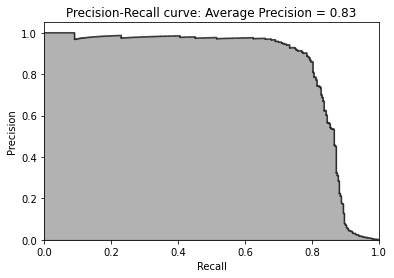

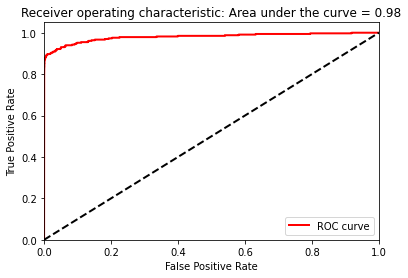

In [77]:

preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# test dataset으로 모델 최종 평가

In [78]:

# 테스트 데이터 셋으로 4가지 모델 평가

### (1) logistic regression

In [79]:

predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

### (2) random forest

In [80]:

predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

### (3) xgboost 

In [81]:

predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

### (4) lightGBM

In [82]:

predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

### 4개 모델 test dataset 평가 결과

In [83]:

print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.09683815457167029
Log Loss of Random Forests on Test Set:  0.009018284462863804
Log Loss of XGBoost Gradient Boosting on Test Set:  0.002424374470342288
Log Loss of LightGBM Gradient Boosting on Test Set:  0.002516958317012632


### (1) logistic regression 그래프

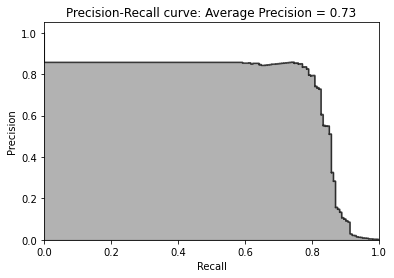

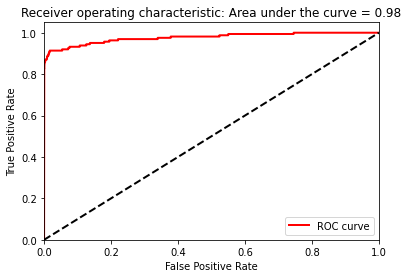

In [84]:

precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### (2) random forest 그래프

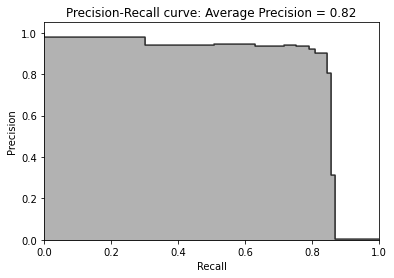

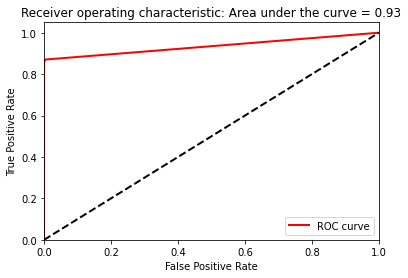

In [85]:

precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### (3) xgboost 그래프

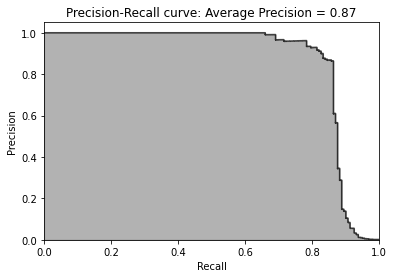

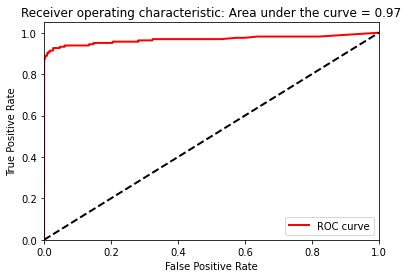

In [86]:

precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### (4) lightGBM 그래프

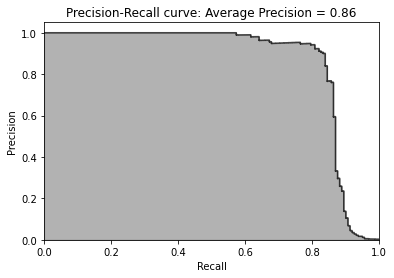

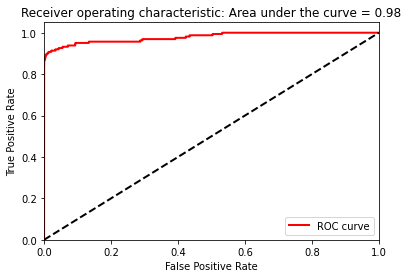

In [87]:

precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# 앙상블 - Stacking

In [88]:

# 앙상블

In [89]:

predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="3").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsXGB','predsLightGBM']

In [90]:

X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

### 하이퍼파라미터 설정하기

In [91]:

params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

### 모델 훈련하기

In [92]:

trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00557207
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00550633
[3]	valid_0's binary_logloss: 0.00545124
[4]	valid_0's binary_logloss: 0.00539379
[5]	valid_0's binary_logloss: 0.00533992
[6]	valid_0's binary_logloss: 0.00529543
[7]	valid_0's binary_logloss: 0.00525235
[8]	valid_0's binary_logloss: 0.00521027
[9]	valid_0's binary_logloss: 0.00516933
[10]	valid_0's binary_logloss: 0.00513042
[11]	valid_0's binary_logloss: 0.00509259
[12]	valid_0's binary_logloss: 0.00505471
[13]	valid_0's binary_logloss: 0.0050209
[14]	valid_0's binary_logloss: 0.0049814
[15]	valid_0's binary_logloss: 0.00494809
[16]	valid_0's binary_logloss: 0.00490735
[17]	valid_0's binary_logloss: 0.0048749
[18]	valid_0's binary_logloss: 0.00483919
[19]	valid_0's binary_logloss: 0.00480411
[20]	valid_0's binary_logloss: 0.00477163
[21]	valid_0's binary_logloss: 0.0047397
[22]	valid_0's binary_logloss: 0.00470857
[23]	valid_0's binary_loglo

[194]	valid_0's binary_logloss: 0.00283703
[195]	valid_0's binary_logloss: 0.00283468
[196]	valid_0's binary_logloss: 0.00283108
[197]	valid_0's binary_logloss: 0.00282756
[198]	valid_0's binary_logloss: 0.00282513
[199]	valid_0's binary_logloss: 0.0028216
[200]	valid_0's binary_logloss: 0.00281911
[201]	valid_0's binary_logloss: 0.00281584
[202]	valid_0's binary_logloss: 0.00281305
[203]	valid_0's binary_logloss: 0.00280835
[204]	valid_0's binary_logloss: 0.00280667
[205]	valid_0's binary_logloss: 0.00280195
[206]	valid_0's binary_logloss: 0.00280074
[207]	valid_0's binary_logloss: 0.00279948
[208]	valid_0's binary_logloss: 0.00279487
[209]	valid_0's binary_logloss: 0.00279229
[210]	valid_0's binary_logloss: 0.00279054
[211]	valid_0's binary_logloss: 0.00278828
[212]	valid_0's binary_logloss: 0.00278615
[213]	valid_0's binary_logloss: 0.0027839
[214]	valid_0's binary_logloss: 0.00278185
[215]	valid_0's binary_logloss: 0.00277896
[216]	valid_0's binary_logloss: 0.00277713
[217]	valid_0

[386]	valid_0's binary_logloss: 0.0025863
[387]	valid_0's binary_logloss: 0.00258641
[388]	valid_0's binary_logloss: 0.00258583
[389]	valid_0's binary_logloss: 0.00258537
[390]	valid_0's binary_logloss: 0.00258491
[391]	valid_0's binary_logloss: 0.00258533
[392]	valid_0's binary_logloss: 0.00258477
[393]	valid_0's binary_logloss: 0.0025842
[394]	valid_0's binary_logloss: 0.00258384
[395]	valid_0's binary_logloss: 0.00258347
[396]	valid_0's binary_logloss: 0.00258304
[397]	valid_0's binary_logloss: 0.00258205
[398]	valid_0's binary_logloss: 0.00258152
[399]	valid_0's binary_logloss: 0.00258112
[400]	valid_0's binary_logloss: 0.00257986
[401]	valid_0's binary_logloss: 0.00257952
[402]	valid_0's binary_logloss: 0.00257895
[403]	valid_0's binary_logloss: 0.00257894
[404]	valid_0's binary_logloss: 0.0025777
[405]	valid_0's binary_logloss: 0.0025772
[406]	valid_0's binary_logloss: 0.00257691
[407]	valid_0's binary_logloss: 0.00257695
[408]	valid_0's binary_logloss: 0.00257573
[409]	valid_0's

[586]	valid_0's binary_logloss: 0.00253521
[587]	valid_0's binary_logloss: 0.00253532
[588]	valid_0's binary_logloss: 0.00253481
[589]	valid_0's binary_logloss: 0.00253518
[590]	valid_0's binary_logloss: 0.00253504
[591]	valid_0's binary_logloss: 0.0025354
[592]	valid_0's binary_logloss: 0.00253528
[593]	valid_0's binary_logloss: 0.00253571
[594]	valid_0's binary_logloss: 0.00253495
[595]	valid_0's binary_logloss: 0.00253565
[596]	valid_0's binary_logloss: 0.00253568
[597]	valid_0's binary_logloss: 0.00253581
[598]	valid_0's binary_logloss: 0.00253507
[599]	valid_0's binary_logloss: 0.0025355
[600]	valid_0's binary_logloss: 0.0025356
[601]	valid_0's binary_logloss: 0.00253538
[602]	valid_0's binary_logloss: 0.00253647
[603]	valid_0's binary_logloss: 0.00253662
[604]	valid_0's binary_logloss: 0.00253659
[605]	valid_0's binary_logloss: 0.00253526
[606]	valid_0's binary_logloss: 0.00253547
[607]	valid_0's binary_logloss: 0.00253585
[608]	valid_0's binary_logloss: 0.00253574
[609]	valid_0'

[778]	valid_0's binary_logloss: 0.00255555
[779]	valid_0's binary_logloss: 0.00255581
[780]	valid_0's binary_logloss: 0.00255549
[781]	valid_0's binary_logloss: 0.00255681
[782]	valid_0's binary_logloss: 0.00255726
[783]	valid_0's binary_logloss: 0.0025574
[784]	valid_0's binary_logloss: 0.00255745
[785]	valid_0's binary_logloss: 0.00255801
[786]	valid_0's binary_logloss: 0.0025582
[787]	valid_0's binary_logloss: 0.00255859
[788]	valid_0's binary_logloss: 0.00255909
Early stopping, best iteration is:
[588]	valid_0's binary_logloss: 0.00253481
Training Log Loss:  0.000600565480458756
CV Log Loss:  0.0025348105323629347
[1]	valid_0's binary_logloss: 0.00607474
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00600593
[3]	valid_0's binary_logloss: 0.00594324
[4]	valid_0's binary_logloss: 0.00588319
[5]	valid_0's binary_logloss: 0.00580706
[6]	valid_0's binary_logloss: 0.00573457
[7]	valid_0's binary_logloss: 0.00567409
[8]	valid_0's binary_logl

[188]	valid_0's binary_logloss: 0.00318409
[189]	valid_0's binary_logloss: 0.00317953
[190]	valid_0's binary_logloss: 0.0031763
[191]	valid_0's binary_logloss: 0.0031742
[192]	valid_0's binary_logloss: 0.00317181
[193]	valid_0's binary_logloss: 0.0031676
[194]	valid_0's binary_logloss: 0.0031653
[195]	valid_0's binary_logloss: 0.00316228
[196]	valid_0's binary_logloss: 0.00315796
[197]	valid_0's binary_logloss: 0.00315501
[198]	valid_0's binary_logloss: 0.00315294
[199]	valid_0's binary_logloss: 0.00314959
[200]	valid_0's binary_logloss: 0.00314761
[201]	valid_0's binary_logloss: 0.00314493
[202]	valid_0's binary_logloss: 0.0031413
[203]	valid_0's binary_logloss: 0.00313966
[204]	valid_0's binary_logloss: 0.0031378
[205]	valid_0's binary_logloss: 0.00313481
[206]	valid_0's binary_logloss: 0.00313212
[207]	valid_0's binary_logloss: 0.00313007
[208]	valid_0's binary_logloss: 0.00312741
[209]	valid_0's binary_logloss: 0.00312472
[210]	valid_0's binary_logloss: 0.00312302
[211]	valid_0's b

[381]	valid_0's binary_logloss: 0.00301628
[382]	valid_0's binary_logloss: 0.00301716
[383]	valid_0's binary_logloss: 0.00301798
[384]	valid_0's binary_logloss: 0.00301899
[385]	valid_0's binary_logloss: 0.00301902
[386]	valid_0's binary_logloss: 0.00301983
[387]	valid_0's binary_logloss: 0.00302102
[388]	valid_0's binary_logloss: 0.00302151
[389]	valid_0's binary_logloss: 0.00302244
[390]	valid_0's binary_logloss: 0.0030225
[391]	valid_0's binary_logloss: 0.00302291
[392]	valid_0's binary_logloss: 0.00302343
[393]	valid_0's binary_logloss: 0.00302411
[394]	valid_0's binary_logloss: 0.00302544
[395]	valid_0's binary_logloss: 0.00302589
[396]	valid_0's binary_logloss: 0.00302602
[397]	valid_0's binary_logloss: 0.00302753
[398]	valid_0's binary_logloss: 0.00302842
[399]	valid_0's binary_logloss: 0.00302853
[400]	valid_0's binary_logloss: 0.00302986
[401]	valid_0's binary_logloss: 0.00303047
[402]	valid_0's binary_logloss: 0.00303189
[403]	valid_0's binary_logloss: 0.00303261
[404]	valid_

[20]	valid_0's binary_logloss: 0.00454765
[21]	valid_0's binary_logloss: 0.00451873
[22]	valid_0's binary_logloss: 0.00448549
[23]	valid_0's binary_logloss: 0.00445457
[24]	valid_0's binary_logloss: 0.0044271
[25]	valid_0's binary_logloss: 0.00439724
[26]	valid_0's binary_logloss: 0.00436879
[27]	valid_0's binary_logloss: 0.00434168
[28]	valid_0's binary_logloss: 0.00431467
[29]	valid_0's binary_logloss: 0.00428708
[30]	valid_0's binary_logloss: 0.00425903
[31]	valid_0's binary_logloss: 0.00423123
[32]	valid_0's binary_logloss: 0.00420455
[33]	valid_0's binary_logloss: 0.00417875
[34]	valid_0's binary_logloss: 0.00415284
[35]	valid_0's binary_logloss: 0.00412773
[36]	valid_0's binary_logloss: 0.00410287
[37]	valid_0's binary_logloss: 0.00407852
[38]	valid_0's binary_logloss: 0.00405543
[39]	valid_0's binary_logloss: 0.00403258
[40]	valid_0's binary_logloss: 0.00401036
[41]	valid_0's binary_logloss: 0.00398705
[42]	valid_0's binary_logloss: 0.0039659
[43]	valid_0's binary_logloss: 0.003

[213]	valid_0's binary_logloss: 0.00267523
[214]	valid_0's binary_logloss: 0.00267337
[215]	valid_0's binary_logloss: 0.00267141
[216]	valid_0's binary_logloss: 0.00267036
[217]	valid_0's binary_logloss: 0.00266834
[218]	valid_0's binary_logloss: 0.00266645
[219]	valid_0's binary_logloss: 0.00266439
[220]	valid_0's binary_logloss: 0.00266324
[221]	valid_0's binary_logloss: 0.00266152
[222]	valid_0's binary_logloss: 0.00265954
[223]	valid_0's binary_logloss: 0.00265849
[224]	valid_0's binary_logloss: 0.00265698
[225]	valid_0's binary_logloss: 0.00265562
[226]	valid_0's binary_logloss: 0.00265414
[227]	valid_0's binary_logloss: 0.00265274
[228]	valid_0's binary_logloss: 0.00265136
[229]	valid_0's binary_logloss: 0.00265006
[230]	valid_0's binary_logloss: 0.00264873
[231]	valid_0's binary_logloss: 0.00264726
[232]	valid_0's binary_logloss: 0.00264599
[233]	valid_0's binary_logloss: 0.00264451
[234]	valid_0's binary_logloss: 0.00264329
[235]	valid_0's binary_logloss: 0.00264159
[236]	valid

[407]	valid_0's binary_logloss: 0.00254286
[408]	valid_0's binary_logloss: 0.00254298
[409]	valid_0's binary_logloss: 0.0025419
[410]	valid_0's binary_logloss: 0.00254246
[411]	valid_0's binary_logloss: 0.00254371
[412]	valid_0's binary_logloss: 0.00254307
[413]	valid_0's binary_logloss: 0.00254321
[414]	valid_0's binary_logloss: 0.00254228
[415]	valid_0's binary_logloss: 0.00254199
[416]	valid_0's binary_logloss: 0.00254215
[417]	valid_0's binary_logloss: 0.00254169
[418]	valid_0's binary_logloss: 0.00254186
[419]	valid_0's binary_logloss: 0.00254142
[420]	valid_0's binary_logloss: 0.0025416
[421]	valid_0's binary_logloss: 0.0025418
[422]	valid_0's binary_logloss: 0.0025418
[423]	valid_0's binary_logloss: 0.00254207
[424]	valid_0's binary_logloss: 0.00254129
[425]	valid_0's binary_logloss: 0.00254104
[426]	valid_0's binary_logloss: 0.00254039
[427]	valid_0's binary_logloss: 0.00254057
[428]	valid_0's binary_logloss: 0.00254016
[429]	valid_0's binary_logloss: 0.00254033
[430]	valid_0's

[601]	valid_0's binary_logloss: 0.00251395
[602]	valid_0's binary_logloss: 0.00251429
[603]	valid_0's binary_logloss: 0.00251448
[604]	valid_0's binary_logloss: 0.00251444
[605]	valid_0's binary_logloss: 0.00251422
[606]	valid_0's binary_logloss: 0.00251434
[607]	valid_0's binary_logloss: 0.00251467
[608]	valid_0's binary_logloss: 0.00251403
[609]	valid_0's binary_logloss: 0.00251329
[610]	valid_0's binary_logloss: 0.00251367
[611]	valid_0's binary_logloss: 0.00251347
[612]	valid_0's binary_logloss: 0.00251341
[613]	valid_0's binary_logloss: 0.00251376
[614]	valid_0's binary_logloss: 0.00251422
[615]	valid_0's binary_logloss: 0.00251455
[616]	valid_0's binary_logloss: 0.00251392
[617]	valid_0's binary_logloss: 0.0025137
[618]	valid_0's binary_logloss: 0.00251333
[619]	valid_0's binary_logloss: 0.00251352
[620]	valid_0's binary_logloss: 0.00251334
[621]	valid_0's binary_logloss: 0.00251324
[622]	valid_0's binary_logloss: 0.00251325
[623]	valid_0's binary_logloss: 0.00251336
[624]	valid_

[797]	valid_0's binary_logloss: 0.00253737
[798]	valid_0's binary_logloss: 0.00253841
[799]	valid_0's binary_logloss: 0.00253855
[800]	valid_0's binary_logloss: 0.00253888
[801]	valid_0's binary_logloss: 0.00253916
[802]	valid_0's binary_logloss: 0.00253881
[803]	valid_0's binary_logloss: 0.00253941
[804]	valid_0's binary_logloss: 0.00253984
[805]	valid_0's binary_logloss: 0.00253967
[806]	valid_0's binary_logloss: 0.00253954
[807]	valid_0's binary_logloss: 0.00253981
[808]	valid_0's binary_logloss: 0.00254048
[809]	valid_0's binary_logloss: 0.00254121
[810]	valid_0's binary_logloss: 0.00254104
[811]	valid_0's binary_logloss: 0.00254093
[812]	valid_0's binary_logloss: 0.00254081
[813]	valid_0's binary_logloss: 0.00254109
[814]	valid_0's binary_logloss: 0.00254093
[815]	valid_0's binary_logloss: 0.00254104
[816]	valid_0's binary_logloss: 0.00254048
[817]	valid_0's binary_logloss: 0.00254046
[818]	valid_0's binary_logloss: 0.00254029
[819]	valid_0's binary_logloss: 0.00254018
[820]	valid

[158]	valid_0's binary_logloss: 0.00290416
[159]	valid_0's binary_logloss: 0.0029006
[160]	valid_0's binary_logloss: 0.00289686
[161]	valid_0's binary_logloss: 0.00289225
[162]	valid_0's binary_logloss: 0.00288889
[163]	valid_0's binary_logloss: 0.00288539
[164]	valid_0's binary_logloss: 0.00288194
[165]	valid_0's binary_logloss: 0.00287913
[166]	valid_0's binary_logloss: 0.00287559
[167]	valid_0's binary_logloss: 0.00287209
[168]	valid_0's binary_logloss: 0.00286884
[169]	valid_0's binary_logloss: 0.00286516
[170]	valid_0's binary_logloss: 0.00286213
[171]	valid_0's binary_logloss: 0.00285877
[172]	valid_0's binary_logloss: 0.00285548
[173]	valid_0's binary_logloss: 0.00285282
[174]	valid_0's binary_logloss: 0.00284968
[175]	valid_0's binary_logloss: 0.00284631
[176]	valid_0's binary_logloss: 0.00284325
[177]	valid_0's binary_logloss: 0.00284024
[178]	valid_0's binary_logloss: 0.00283735
[179]	valid_0's binary_logloss: 0.00283445
[180]	valid_0's binary_logloss: 0.00283148
[181]	valid_

[350]	valid_0's binary_logloss: 0.00259849
[351]	valid_0's binary_logloss: 0.00259844
[352]	valid_0's binary_logloss: 0.0025978
[353]	valid_0's binary_logloss: 0.0025965
[354]	valid_0's binary_logloss: 0.00259594
[355]	valid_0's binary_logloss: 0.00259489
[356]	valid_0's binary_logloss: 0.00259488
[357]	valid_0's binary_logloss: 0.00259365
[358]	valid_0's binary_logloss: 0.00259304
[359]	valid_0's binary_logloss: 0.0025921
[360]	valid_0's binary_logloss: 0.00259169
[361]	valid_0's binary_logloss: 0.00259183
[362]	valid_0's binary_logloss: 0.00259128
[363]	valid_0's binary_logloss: 0.00259071
[364]	valid_0's binary_logloss: 0.00258887
[365]	valid_0's binary_logloss: 0.00258827
[366]	valid_0's binary_logloss: 0.00258771
[367]	valid_0's binary_logloss: 0.00258791
[368]	valid_0's binary_logloss: 0.00258756
[369]	valid_0's binary_logloss: 0.00258557
[370]	valid_0's binary_logloss: 0.00258496
[371]	valid_0's binary_logloss: 0.00258473
[372]	valid_0's binary_logloss: 0.0025847
[373]	valid_0's

[546]	valid_0's binary_logloss: 0.00261052
[547]	valid_0's binary_logloss: 0.00261051
[548]	valid_0's binary_logloss: 0.00260983
[549]	valid_0's binary_logloss: 0.00261048
[550]	valid_0's binary_logloss: 0.00261022
[551]	valid_0's binary_logloss: 0.00261109
[552]	valid_0's binary_logloss: 0.00261198
[553]	valid_0's binary_logloss: 0.00261172
[554]	valid_0's binary_logloss: 0.00261124
[555]	valid_0's binary_logloss: 0.00261305
[556]	valid_0's binary_logloss: 0.00261358
[557]	valid_0's binary_logloss: 0.00261462
[558]	valid_0's binary_logloss: 0.00261503
[559]	valid_0's binary_logloss: 0.00261584
[560]	valid_0's binary_logloss: 0.00261537
[561]	valid_0's binary_logloss: 0.00261506
[562]	valid_0's binary_logloss: 0.00261542
[563]	valid_0's binary_logloss: 0.00261507
[564]	valid_0's binary_logloss: 0.00261511
[565]	valid_0's binary_logloss: 0.00261474
[566]	valid_0's binary_logloss: 0.00261486
[567]	valid_0's binary_logloss: 0.00261451
[568]	valid_0's binary_logloss: 0.00261501
[569]	valid

[120]	valid_0's binary_logloss: 0.00384688
[121]	valid_0's binary_logloss: 0.00384155
[122]	valid_0's binary_logloss: 0.00383419
[123]	valid_0's binary_logloss: 0.00382781
[124]	valid_0's binary_logloss: 0.00382216
[125]	valid_0's binary_logloss: 0.00381622
[126]	valid_0's binary_logloss: 0.00381097
[127]	valid_0's binary_logloss: 0.00380494
[128]	valid_0's binary_logloss: 0.0037989
[129]	valid_0's binary_logloss: 0.00379374
[130]	valid_0's binary_logloss: 0.00378746
[131]	valid_0's binary_logloss: 0.00378295
[132]	valid_0's binary_logloss: 0.00377681
[133]	valid_0's binary_logloss: 0.00377146
[134]	valid_0's binary_logloss: 0.00376656
[135]	valid_0's binary_logloss: 0.00376071
[136]	valid_0's binary_logloss: 0.00375501
[137]	valid_0's binary_logloss: 0.00375069
[138]	valid_0's binary_logloss: 0.00374595
[139]	valid_0's binary_logloss: 0.00374162
[140]	valid_0's binary_logloss: 0.00373701
[141]	valid_0's binary_logloss: 0.00373299
[142]	valid_0's binary_logloss: 0.00372748
[143]	valid_

[313]	valid_0's binary_logloss: 0.00346627
[314]	valid_0's binary_logloss: 0.00346569
[315]	valid_0's binary_logloss: 0.00346695
[316]	valid_0's binary_logloss: 0.00346642
[317]	valid_0's binary_logloss: 0.00346589
[318]	valid_0's binary_logloss: 0.00346652
[319]	valid_0's binary_logloss: 0.00346688
[320]	valid_0's binary_logloss: 0.00346751
[321]	valid_0's binary_logloss: 0.00346787
[322]	valid_0's binary_logloss: 0.00346874
[323]	valid_0's binary_logloss: 0.00346987
[324]	valid_0's binary_logloss: 0.0034708
[325]	valid_0's binary_logloss: 0.00347181
[326]	valid_0's binary_logloss: 0.00347137
[327]	valid_0's binary_logloss: 0.00347201
[328]	valid_0's binary_logloss: 0.00347245
[329]	valid_0's binary_logloss: 0.0034731
[330]	valid_0's binary_logloss: 0.00347272
[331]	valid_0's binary_logloss: 0.00347271
[332]	valid_0's binary_logloss: 0.00347307
[333]	valid_0's binary_logloss: 0.00347367
[334]	valid_0's binary_logloss: 0.00347415
[335]	valid_0's binary_logloss: 0.00347386
[336]	valid_0

In [93]:

print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [111, 111, 37, 76, 158, 60, 28, 128, 197, 70, 111, 77, 111, 80, 280, 46, 65, 29, 60, 246, 30, 89, 142, 72, 128, 142, 161, 28, 92, 304, 136, 205, 211, 362]


### 모델 평가하기

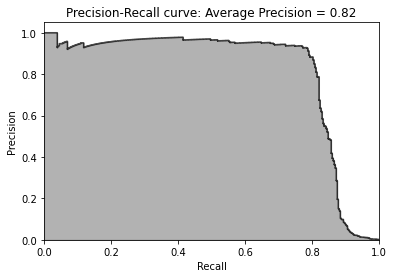

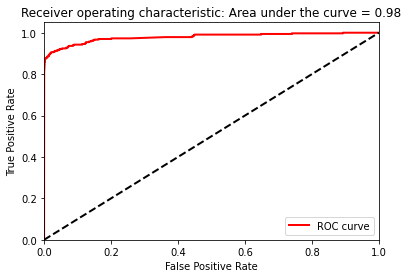

In [94]:

preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

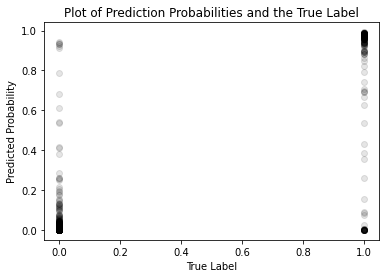

In [95]:

scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

# 최종 모델 선택하기

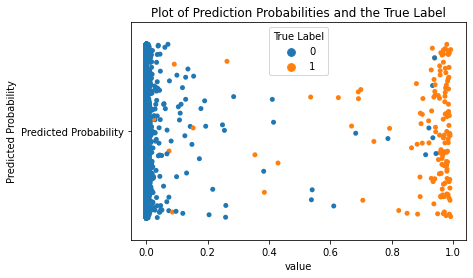

In [96]:

scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
scatterDataMelted.head()
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [97]:

'''새로운 데이터를 위한 파이프라인'''
# 첫번째, 'newData'로 불리는 데이터 프레임에 새로운 데이터 불러오기
# 두번째, 데이터 스케일
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# 세번째, LightGBM을 사용한 예측
# gbm.predict(newData, num_iteration=gbm.best_iteration)

'새로운 데이터를 위한 파이프라인'